<a href="https://colab.research.google.com/github/TomisinA/Network-Intrusion-Detection-Using-Machine-Learning-and-Data-Mining/blob/main/Network_Intrusion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import *
from sklearn. metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv('UNR-IDD.csv')

In [ ]:
dataset.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [ ]:
dataset.tail(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37410,of:0000000000000009,Port#:3,228,30377,25258600,1138,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack


# Exploratory Data Analysis

## Finding the Characteristics of the Dataset

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [ ]:
print(dataset.shape)

(37411, 34)


In [ ]:
print(dataset.columns)

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')


In [ ]:
dataset.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

In [ ]:
#find numerical and categorical values
df_num = dataset.select_dtypes(include=['int64', 'bool'])
df_cat = set(dataset.columns) - set(df_num) 

In [ ]:
df_num.columns

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Packets Rx Dropped', 'Packets Tx Dropped',
       'Packets Rx Errors', 'Packets Tx Errors', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size'],
      dtype='object')

In [ ]:
df_cat

{'Binary Label', 'Label', 'Port Number', 'Switch ID'}

In [ ]:
#to find columns with one unique values and drop them
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
      dataset.drop(col,inplace=True,axis=1)

In [ ]:
dataset

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,280,...,0,0,0,0,0,9,767,688,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,146,5908166,5969,...,0,0,0,0,0,9,767,688,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,2,278,280,...,0,0,0,0,0,9,767,688,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,2,278,280,...,0,0,0,0,0,9,767,688,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,280,...,0,0,0,0,0,7,489,403,TCP-SYN,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,4,556,288376,...,0,0,0,0,0,6,147563,147454,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,4,556,556,...,0,0,0,0,0,6,147563,147454,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,4,556,288376,...,0,0,0,0,0,8,295511,295404,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,5381,291755,556,...,0,0,0,0,0,8,295511,295404,PortScan,Attack


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Delta Received Packets         37411 non-null  int64 
 8   Delta Received Bytes           37411 non-null  int64 
 9   Delta Sent Bytes               37411 non-null  int64 
 10  Delta Sent Packets             37411 non-null  int64 
 11  Delta Port alive Duration (S)  37411 non-null  int64 
 12  Connection Point               37411 non-null  int64 
 13  T

## Visualizing the Dataset

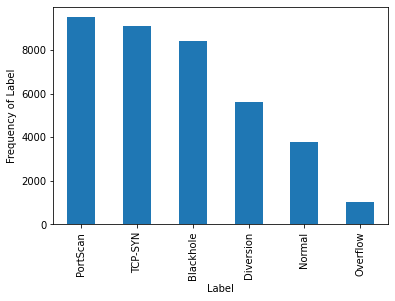

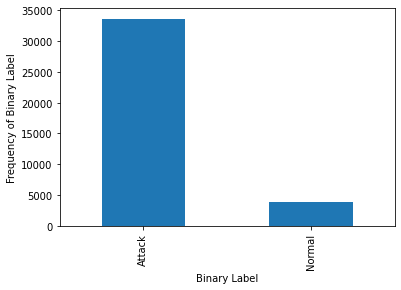

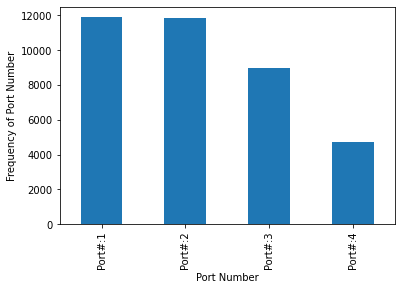

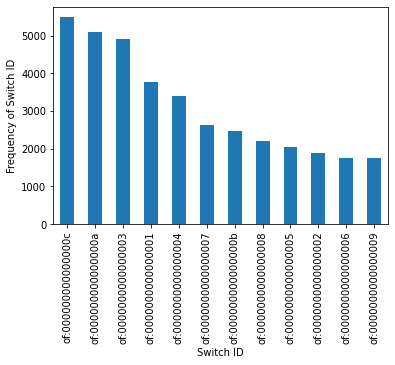

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the bar graph of all categorical variables
for i in df_cat:
  dataset[i].value_counts().plot(kind="bar")
  plt.xlabel(i)
  plt.ylabel('Frequency of ' + i)
  plt.figure()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d758949a0>,
      dtype=object)

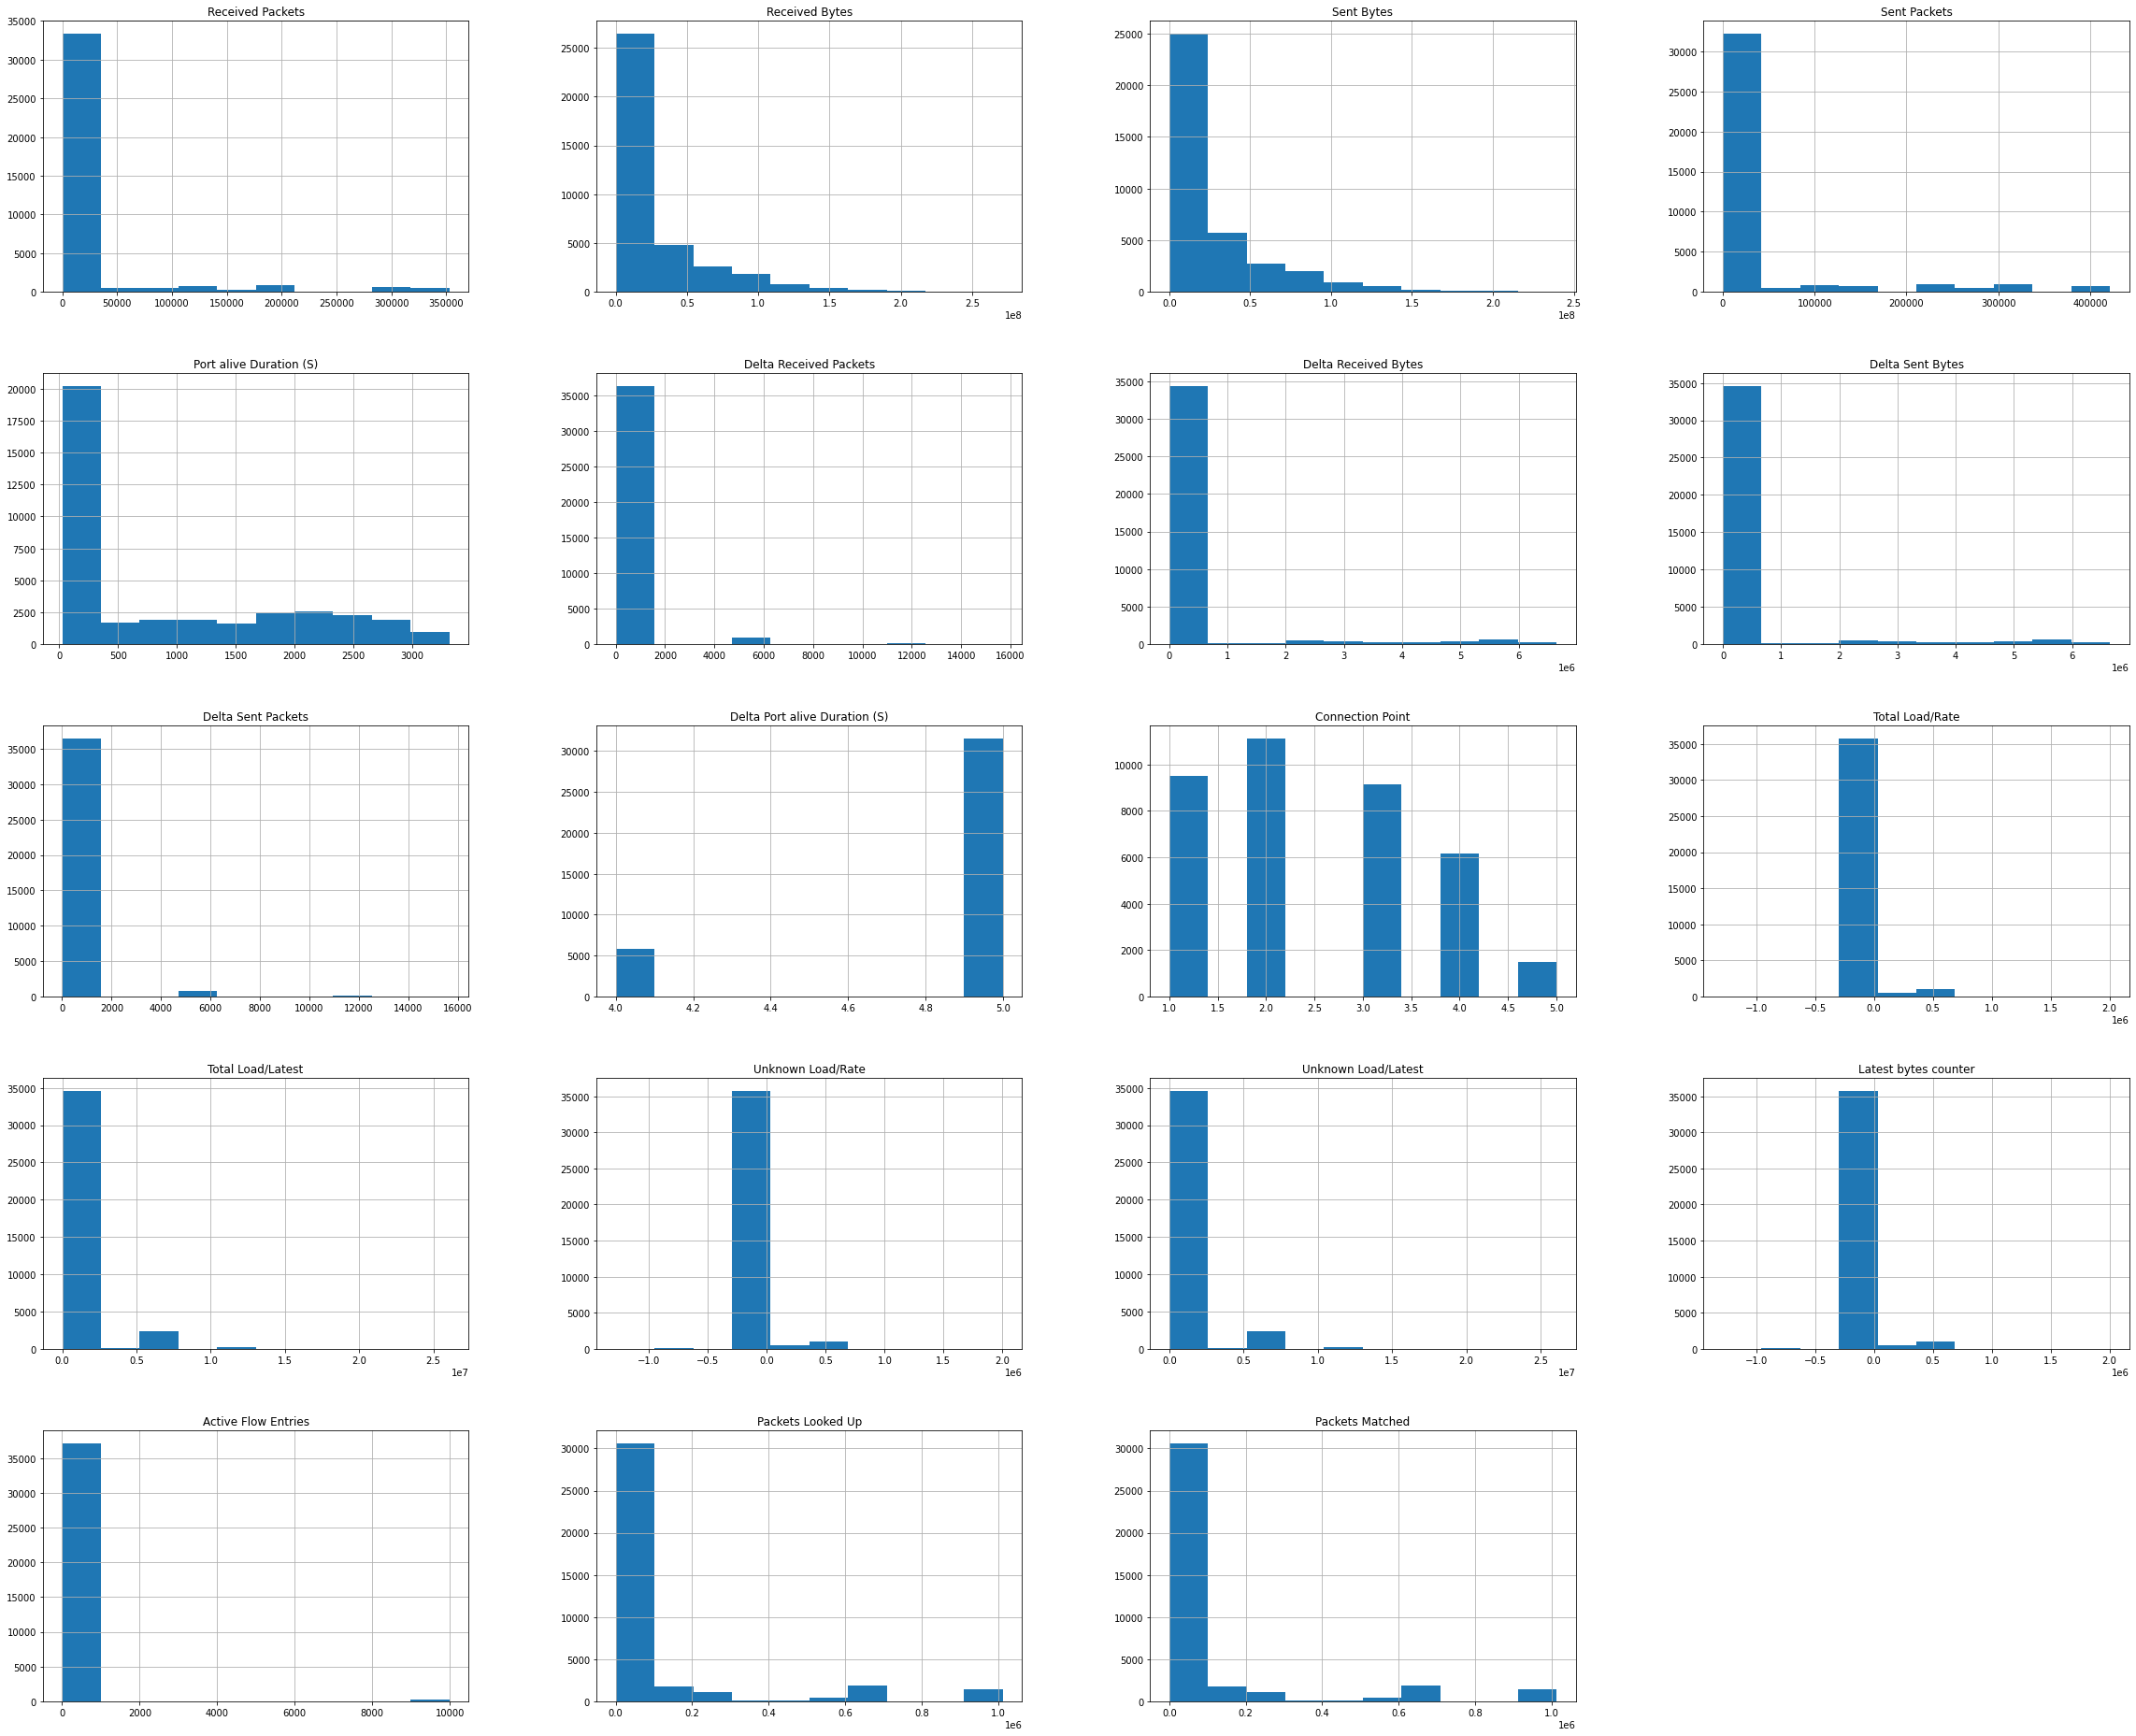

In [ ]:
dataset.hist(layout=(6,4), figsize=(40,40))

Text(0.5, 1.0, 'Attack Labels vs Connection Point')

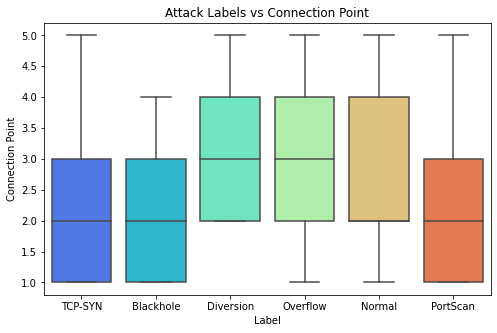

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Label',y='Connection Point',data=dataset, palette='rainbow')
plt.title("Attack Labels vs Connection Point")

Text(0.5, 1.0, 'Binary Label on two numeric columns')

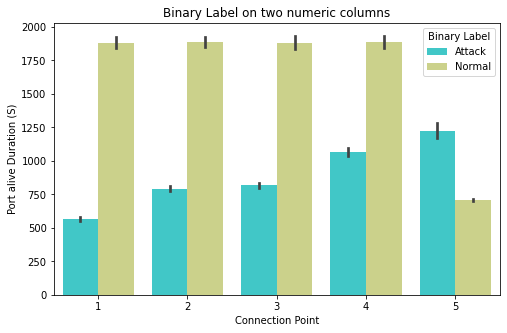

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Connection Point',y='Port alive Duration (S)',data=dataset, palette='rainbow', hue ='Binary Label')
plt.title("Binary Label on two numeric columns")

## Feature Selection

In [ ]:
#To find correlation between the columns in the dataset
dataset_corr = dataset.corr().abs()
dataset_corr


,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Received Packets,1.000000,0.235931,0.263276,0.585578,0.201716,0.178632,0.009830,0.000463,0.086540,0.068982,0.143162,0.020503,0.033358,0.020503,0.033358,0.020503,0.032871,0.737932,0.737933
Received Bytes,0.235931,1.000000,0.678341,0.393544,0.753177,0.042367,0.098901,0.007656,0.063304,0.013239,0.112916,0.021954,0.005309,0.021954,0.005309,0.021954,0.033760,0.378620,0.378530
Sent Bytes,0.263276,0.678341,1.000000,0.492114,0.744272,0.072000,0.005275,0.087682,0.039423,0.025379,0.038600,0.030343,0.030538,0.030343,0.030538,0.030343,0.032480,0.452300,0.452223
Sent Packets,0.585578,0.393544,0.492114,1.000000,0.291104,0.034219,0.011125,0.020418,0.103534,0.094366,0.037271,0.021972,0.025320,0.021972,0.025320,0.021972,0.038064,0.936095,0.936094
Port alive Duration (S),0.201716,0.753177,0.744272,0.291104,1.000000,0.124533,0.011960,0.008339,0.118922,0.005844,0.161257,0.003296,0.024441,0.003296,0.024441,0.003296,0.031836,0.287166,0.287050
Delta Received Packets,0.178632,0.042367,0.072000,0.034219,0.124533,1.000000,0.098319,0.037238,0.600443,0.010933,0.002523,0.014579,0.022130,0.014579,0.022130,0.014579,0.017069,0.044765,0.044780
Delta Received Bytes,0.009830,0.098901,0.005275,0.011125,0.011960,0.098319,1.000000,0.070402,0.035802,0.004953,0.014501,0.008069,0.001920,0.008069,0.001920,0.008069,0.008300,0.007832,0.007830
Delta Sent Bytes,0.000463,0.007656,0.087682,0.020418,0.008339,0.037238,0.070402,1.000000,0.105281,0.000359,0.028580,0.266750,0.197357,0.266750,0.197357,0.266750,0.007258,0.005916,0.005916
Delta Sent Packets,0.086540,0.063304,0.039423,0.103534,0.118922,0.600443,0.035802,0.105281,1.000000,0.007505,0.032092,0.011551,0.019009,0.011551,0.019009,0.011551,0.016079,0.041024,0.041039
Delta Port alive Duration (S),0.068982,0.013239,0.025379,0.094366,0.005844,0.010933,0.004953,0.000359,0.007505,1.000000,0.000686,0.002853,0.007732,0.002853,0.007732,0.002853,0.050385,0.093856,0.093863


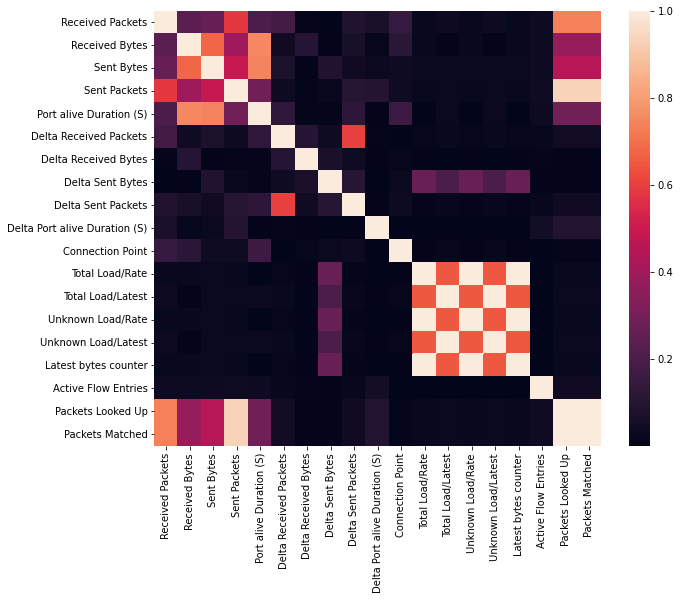

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(dataset_corr)

plt.show()

In [ ]:
lower_triangular_corr = dataset_corr.where(np.tril(np.ones(dataset_corr.shape),k=-1).astype(np.bool))
print(lower_triangular_corr)

                               Received Packets  Received Bytes  Sent Bytes  \
Received Packets                            NaN             NaN         NaN   
Received Bytes                         0.235931             NaN         NaN   
Sent Bytes                             0.263276        0.678341         NaN   
Sent Packets                           0.585578        0.393544    0.492114   
Port alive Duration (S)                0.201716        0.753177    0.744272   
Delta Received Packets                 0.178632        0.042367    0.072000   
Delta Received Bytes                   0.009830        0.098901    0.005275   
Delta Sent Bytes                       0.000463        0.007656    0.087682   
Delta Sent Packets                     0.086540        0.063304    0.039423   
Delta Port alive Duration (S)          0.068982        0.013239    0.025379   
Connection Point                       0.143162        0.112916    0.038600   
Total Load/Rate                        0.020503     

In [ ]:
#using 0.8 as the maximum for correlation
corr_drop = [column for column in lower_triangular_corr.columns if any(lower_triangular_corr[column] > 0.8)]
print(corr_drop)

['Sent Packets', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate', 'Packets Looked Up']


In [ ]:
dataset = dataset.drop(corr_drop, axis=1)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Port alive Duration (S)        37411 non-null  int64 
 6   Delta Received Packets         37411 non-null  int64 
 7   Delta Received Bytes           37411 non-null  int64 
 8   Delta Sent Bytes               37411 non-null  int64 
 9   Delta Sent Packets             37411 non-null  int64 
 10  Delta Port alive Duration (S)  37411 non-null  int64 
 11  Connection Point               37411 non-null  int64 
 12  Unknown Load/Latest            37411 non-null  int64 
 13  L

## Splitting and Encoding the Features

In [ ]:
X= dataset.drop(['Label', 'Binary Label'], axis=1)
y = dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.info())

(22446, 16)
(14965, 16)
(22446,)
(14965,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22446 entries, 34697 to 33003
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      22446 non-null  object
 1   Port Number                    22446 non-null  object
 2   Received Packets               22446 non-null  int64 
 3   Received Bytes                 22446 non-null  int64 
 4   Sent Bytes                     22446 non-null  int64 
 5   Port alive Duration (S)        22446 non-null  int64 
 6   Delta Received Packets         22446 non-null  int64 
 7   Delta Received Bytes           22446 non-null  int64 
 8   Delta Sent Bytes               22446 non-null  int64 
 9   Delta Sent Packets             22446 non-null  int64 
 10  Delta Port alive Duration (S)  22446 non-null  int64 
 11  Connection Point               22446 non-null  int64 
 12  Unknown Load/L

In [ ]:
#one hot encode Switch ID and Port Number
categorical_features = ['Port Number', 'Switch ID']

In [ ]:
encoder = OneHotEncoder()

train_end = encoder.fit_transform(X_train[categorical_features]).toarray()
test_end = encoder.transform(X_test[categorical_features]).toarray()

In [ ]:
train_end = pd.DataFrame(train_end, index=X_train.index)
test_end = pd.DataFrame(test_end, index=X_test.index)

In [ ]:
r = X_train.drop(columns=categorical_features)
g = X_test.drop(columns=categorical_features)

In [ ]:
X_train_encoded = pd.concat([train_end, r], axis = 1)
X_test_encoded = pd.concat([test_end, g], axis=1)

In [ ]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(22446, 30)
(14965, 30)


In [ ]:
sc = StandardScaler()
X_train_encoded = sc.fit_transform(X_train_encoded)
X_test_encoded = sc.transform(X_test_encoded)

In [ ]:
lbe = LabelEncoder()
lbe.fit(y_train)
y_train_encoded = lbe.transform(y_train)
y_test_encoded = lbe.transform(y_test)

In [ ]:
print(X_train_encoded.shape, X_test_encoded.shape)
print(y_train_encoded.shape, y_test_encoded.shape)

(22446, 30) (14965, 30)
(22446,) (14965,)


# Logistic Regression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train_encoded,y_train_encoded)

train_pred = LR.predict(X_train_encoded)
test_pred = LR.predict(X_test_encoded)

In [ ]:
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F1-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))

Accuracy train score:  0.8462977813418872
Accuracy test score:  0.8449716004009356
Precision test score:  0.8449716004009356
Recall test score:  0.8449716004009356
F1-score test score:  0.8449716004009356


In [ ]:
print(classification_report(y_test_encoded,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3329
           1       0.97      0.96      0.96      2321
           2       1.00      1.00      1.00      1454
           3       0.67      0.49      0.57       402
           4       0.87      0.61      0.72      3783
           5       0.66      0.90      0.76      3676

    accuracy                           0.84     14965
   macro avg       0.86      0.82      0.83     14965
weighted avg       0.86      0.84      0.84     14965



[[3130    0    0    5   15  179]
 [   0 2224    0   90    0    7]
 [   0    0 1454    0    0    0]
 [  35   74    0  198   27   68]
 [   0    3    0    1 2321 1458]
 [  42    3    0    3  310 3318]]


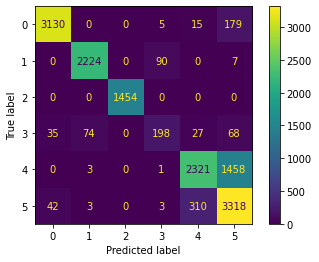

In [ ]:
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LR.classes_)
disp.plot()
plt.show()

# k-Nearest Neighbours

In [ ]:
train_scores = []
test_scores = []
neighbours = range(1,15)
from sklearn.neighbors import KNeighborsClassifier
for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors = neighbour)
  # Fit the classifier on X_train, y_train
    knn.fit(X_train_encoded, y_train_encoded)
  # Make predictions on train data.  Store the values in train_pred variable.
    train_pred = knn.predict(X_train_encoded)
  # Make predictions on test data.  Store the values in test_pred variable.
    test_pred = knn.predict(X_test_encoded)
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
    train_accuracy = accuracy_score(y_train_encoded, train_pred)
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
    test_accuracy = accuracy_score(y_test_encoded, test_pred)
  # Append training accuracy in list train_scores.
    train_scores.append(train_accuracy)
  # Append test accuracy in list test-scores.
    test_scores.append(test_accuracy)

In [ ]:
train_scores

[1.0,
 0.9393655885235677,
 0.9295642876236301,
 0.9128575247260091,
 0.9045709703287891,
 0.8947251180611244,
 0.8865276663993584,
 0.8767263654994208,
 0.8699100062371915,
 0.8652321126258576,
 0.8589503697763521,
 0.855029849416377,
 0.8488372093023255,
 0.8450948944132585]

In [ ]:
test_scores

[0.8666889408620113,
 0.8500501169395256,
 0.8491814233210825,
 0.8452388907450719,
 0.8431673905780154,
 0.8390243902439024,
 0.8359505512863348,
 0.8322753090544605,
 0.831139325091881,
 0.8280654861343134,
 0.8247243568326095,
 0.8219846308052121,
 0.8199799532241898,
 0.816839291680588]

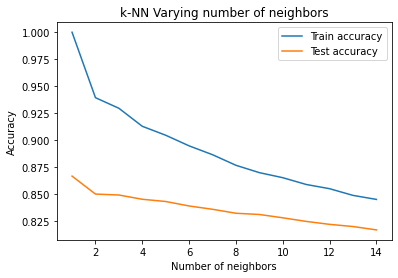

In [ ]:
plt.title('k-NN Varying number of neighbors')
#Code to plot neigbours vs train scores. 
plt.plot(neighbours, train_scores, label = 'Train accuracy')
#code to plot neigbours vs test scores. 
plt.plot(neighbours, test_scores, label = 'Test accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2)

KNN.fit(X_train_encoded,y_train_encoded)

train_pred = KNN.predict(X_train_encoded)
test_pred = KNN.predict(X_test_encoded)

In [ ]:
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))

Accuracy train score:  0.9393655885235677
Accuracy test score:  0.8500501169395256
Precision test score:  0.8500501169395256
Recall test score:  0.8500501169395256
F-score test score:  0.8500501169395256


In [ ]:
print(classification_report(y_test_encoded,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3329
           1       0.94      0.94      0.94      2321
           2       1.00      0.99      1.00      1454
           3       0.62      0.59      0.60       402
           4       0.75      0.87      0.80      3783
           5       0.84      0.66      0.74      3676

    accuracy                           0.85     14965
   macro avg       0.84      0.83      0.83     14965
weighted avg       0.85      0.85      0.85     14965



[[3124   29    2   15   94   65]
 [  97 2189    0   13   15    7]
 [   3    2 1445    2    2    0]
 [  31   60    0  236   35   40]
 [  94   15    1   43 3287  343]
 [ 172   22    0   73  969 2440]]


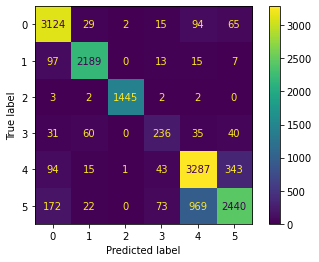

In [ ]:
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = KNN.classes_)
disp.plot()
plt.show()

# Support Vector Machines (SVM)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy =[]

for row in kernels:
  SC = SVC(kernel = row)
  SC.fit(X_train_encoded, y_train_encoded)
  y_pred = SC.predict(X_test_encoded)
  accuracy.append(accuracy_score(y_test_encoded, y_pred))

print(accuracy)

[0.8452388907450719, 0.7973270965586369, 0.8251252923488139, 0.6449716004009355]


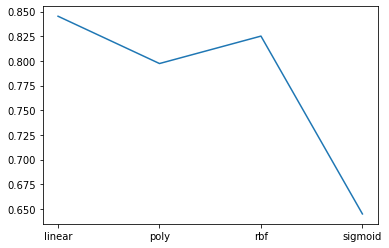

In [ ]:
plt.plot (kernels, accuracy)

In [ ]:
svm = SVC(kernel='linear')

svm.fit(X_train_encoded,y_train_encoded)

train_pred = svm.predict(X_train_encoded)
test_pred = svm.predict(X_test_encoded)

In [ ]:
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))

Accuracy train score:  0.8494163770827764
Accuracy test score:  0.8452388907450719
Precision test score:  0.8452388907450719
Recall test score:  0.8452388907450719
F-score test score:  0.8452388907450719


In [ ]:
print(classification_report(y_test_encoded,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3329
           1       0.97      0.97      0.97      2321
           2       1.00      1.00      1.00      1454
           3       0.75      0.48      0.59       402
           4       0.97      0.53      0.69      3783
           5       0.64      0.97      0.77      3676

    accuracy                           0.85     14965
   macro avg       0.88      0.82      0.83     14965
weighted avg       0.88      0.85      0.84     14965



[[3175    0    0    0    3  151]
 [   0 2248    0   61    0   12]
 [   0    0 1454    0    0    0]
 [  51   75    0  194    3   79]
 [   1    0    0    0 2012 1770]
 [  42    4    0    3   61 3566]]


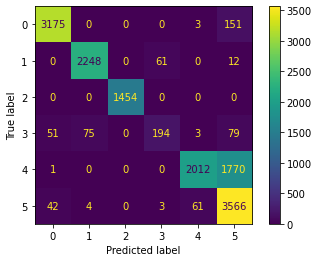

In [ ]:
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()

# Decision Trees

In [ ]:
DT = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=3, min_samples_leaf=5) 
DT.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

In [ ]:
train_pred = DT.predict(X_train_encoded)
test_pred = DT.predict(X_test_encoded)

In [ ]:
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))

Accuracy train score:  0.7218212599126793
Accuracy test score:  0.7107918476445039
Precision test score:  0.7107918476445039
Recall test score:  0.7107918476445039
F-score test score:  0.7107918476445039


In [ ]:
print(classification_report(y_test_encoded,test_pred))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      3329
           1       0.00      0.00      0.00      2321
           2       1.00      1.00      1.00      1454
           3       0.00      0.00      0.00       402
           4       0.94      0.64      0.76      3783
           5       0.67      0.98      0.79      3676

    accuracy                           0.71     14965
   macro avg       0.53      0.59      0.54     14965
weighted avg       0.62      0.71      0.64     14965



[[3165    0    0    0    0  164]
 [2187    0    0    0   58   76]
 [   0    0 1454    0    0    0]
 [ 140    0    0    0   65  197]
 [   0    0    0    0 2433 1350]
 [  45    0    0    0   46 3585]]


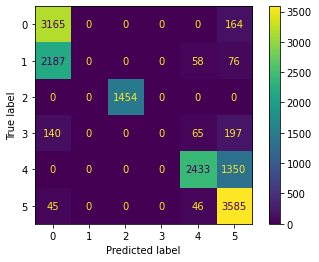

In [ ]:
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT.classes_)
disp.plot()
plt.show()

# Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=100, criterion='gini',  min_samples_split=2, min_samples_leaf=1)
RF.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier()

In [ ]:
train_pred = RF.predict(X_train_encoded)
test_pred = RF.predict(X_test_encoded)

In [ ]:
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))

Accuracy train score:  1.0
Accuracy test score:  0.940327430671567
Precision test score:  0.940327430671567
Recall test score:  0.940327430671567
F-score test score:  0.940327430671567


In [ ]:
print(classification_report(y_test_encoded,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3329
           1       0.99      0.97      0.98      2321
           2       1.00      1.00      1.00      1454
           3       0.98      0.70      0.82       402
           4       0.90      0.91      0.91      3783
           5       0.88      0.92      0.90      3676

    accuracy                           0.94     14965
   macro avg       0.96      0.91      0.93     14965
weighted avg       0.94      0.94      0.94     14965



[[3228    0    0    0   35   66]
 [   7 2262    0    5   35   12]
 [   0    0 1454    0    0    0]
 [  24   21    0  281   37   39]
 [   0    0    0    0 3456  327]
 [  11    1    0    0  273 3391]]


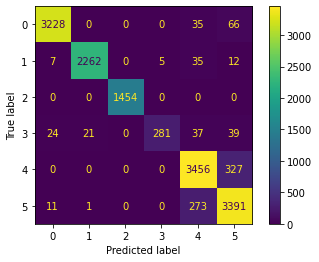

In [ ]:
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT.classes_)
disp.plot()
plt.show()

# Result (Metrices Comparison)

## Training Accuracy

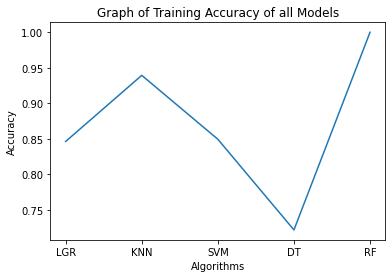

In [ ]:
training_accuracy = [0.8462977813418872, 0.9393655885235677, 0.8494163770827764, 0.7218212599126793, 1.0]
algorithms = ['LGR','KNN','SVM','DT','RF']
plt.plot(algorithms, training_accuracy)
plt.title('Graph of Training Accuracy of all Models')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

##Test Metrices

### Testing Accuracy 

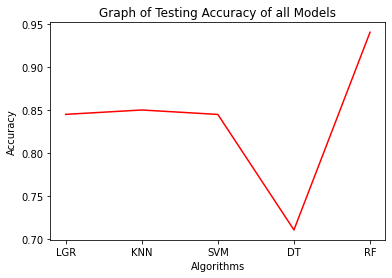

In [ ]:
testing_accuracy = [0.8449716004009356, 0.8500501169395256, 0.8448859586600143, 0.7107918476445039, 0.940327430671567]
algorithms = ['LGR','KNN','SVM','DT','RF']
plt.plot(algorithms, testing_accuracy, color = 'red')
plt.title('Graph of Testing Accuracy of all Models')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

### Testing Precision Graph
 

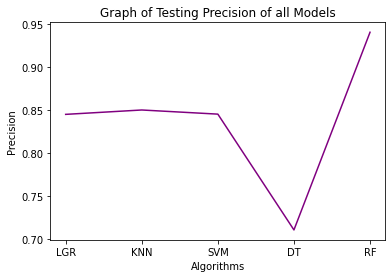

In [ ]:
testing_precision = [0.8449716004009356, 0.8500501169395256, 0.8452388907450719, 0.7107918476445039, 0.940327430671567]
algorithms = ['LGR','KNN','SVM','DT','RF']
plt.plot(algorithms, testing_precision, color = 'purple')
plt.title('Graph of Testing Precision of all Models')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.show()

### Testing Recall


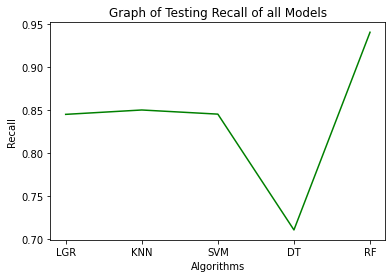

In [ ]:
testing_recall = [0.8449716004009356, 0.8500501169395256, 0.8452388907450719, 0.7107918476445039, 0.940327430671567]
algorithms = ['LGR','KNN','SVM','DT','RF']
plt.plot(algorithms, testing_recall, color = 'green')
plt.title('Graph of Testing Recall of all Models')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.show()

### Testing f1 score


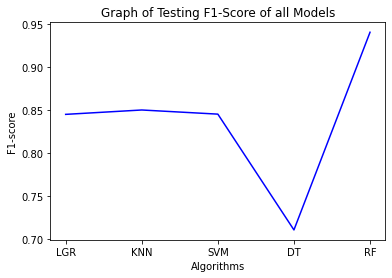

In [ ]:
testing_f1_score= [0.8449716004009356, 0.8500501169395256, 0.8452388907450719, 0.7107918476445039, 0.940327430671567]
algorithms = ['LGR','KNN','SVM','DT','RF']
plt.plot(algorithms, testing_f1_score, color = 'blue')
plt.title('Graph of Testing F1-Score of all Models')
plt.xlabel('Algorithms')
plt.ylabel('F1-score')
plt.show()

##Based on the graphs oif the metrices plotted( accuracy, f11score, precision, recall), Random forest gave the best values for all the metrices, hence RF was chosen as the final model

#Final model - Random Forest


Accuracy train score:  1.0
Accuracy test score:  0.9385232208486468
Precision test score:  0.9385232208486468
Recall test score:  0.9385232208486468
F-score test score:  0.9385232208486468
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3329
           1       0.99      0.97      0.98      2321
           2       1.00      1.00      1.00      1454
           3       0.98      0.70      0.82       402
           4       0.90      0.91      0.90      3783
           5       0.88      0.92      0.90      3676

    accuracy                           0.94     14965
   macro avg       0.96      0.91      0.93     14965
weighted avg       0.94      0.94      0.94     14965

[[3228    0    0    0   36   65]
 [   9 2260    0    5   34   13]
 [   0    0 1454    0    0    0]
 [  27   16    0  280   37   42]
 [   0    0    0    0 3448  335]
 [  11    1    0    0  289 3375]]


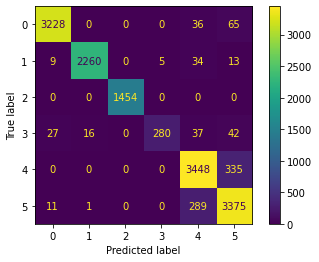

In [ ]:
RF = RandomForestClassifier(n_estimators=100, criterion='gini',  min_samples_split=2, min_samples_leaf=1)
RF.fit(X_train_encoded, y_train_encoded)
train_pred = RF.predict(X_train_encoded)
test_pred = RF.predict(X_test_encoded)
print("Accuracy train score: ", accuracy_score(y_train_encoded, train_pred))
print("Accuracy test score: ", accuracy_score(y_test_encoded, test_pred))
print("Precision test score: ", precision_score(y_test_encoded, test_pred, average = 'micro' ))
print("Recall test score: ", recall_score(y_test_encoded, test_pred, average = 'micro' ))
print("F-score test score: ", f1_score(y_test_encoded, test_pred, average = 'micro' ))
print(classification_report(y_test_encoded,test_pred))
print(confusion_matrix(y_test_encoded,test_pred))
cm = confusion_matrix(y_test_encoded,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT.classes_)
disp.plot()
plt.show()

In [ ]:
print('Accuracy of attack types based on Random Forest: ', cm.diagonal()/cm.sum(axis=1))

Accuracy of attack types based on Random Forest:  [0.96966056 0.97371822 1.         0.69651741 0.91144594 0.91811752]


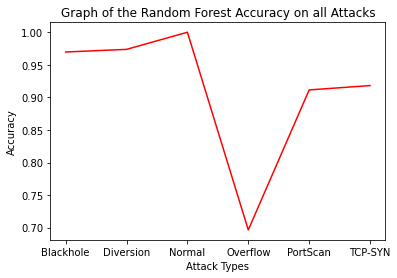

In [ ]:
class_accuracy = cm.diagonal()/cm.sum(axis=1)
classes = lbe.inverse_transform([0, 1, 2,3,4,5])
plt.plot(classes, class_accuracy, color = 'red')
plt.title('Graph of the Random Forest Accuracy on all Attacks')
plt.xlabel('Attack Types')
plt.ylabel('Accuracy')
plt.show()

##Based on the graphs of the accuracy plotted for individual classes, class 'Normal' has the highest accuracy which means of the 1454 samples of class 'Normal' in the dataset,  all were classified correctly, i.e 100%.
#similarly, class 'overflow' had the lowest accuracy, has only 280 of the total 402 samples belonging to class overflow were predicted accurately, hence giving accuracy of 69%

In [ ]:
print(lbe.inverse_transform([0, 1, 2,3,4,5]))

['Blackhole' 'Diversion' 'Normal' 'Overflow' 'PortScan' 'TCP-SYN']
